In [ ]:
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join

path_dir = join("..", "..", "data", "feature_engineered")

train = pd.read_csv(join(path_dir, "baseline", "baseline_engineered_train.csv"))
test = pd.read_csv(join(path_dir, "baseline", "baseline_engineered_test.csv"))

df_train = train.copy()
df_test = test.copy()

df_train.head(3)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2


## Age group

In [ ]:
df_train["below_12"] = (df_train["Age"] < 12).astype(int)
df_train["12_to_17"] = ((df_train["Age"] >= 12) & (df_train["Age"] < 18)).astype(int)
df_train["18_to_31"] = ((df_train["Age"] >= 18) & (df_train["Age"] < 32)).astype(int)
df_train["32_to_44"] = ((df_train["Age"] >= 32) & (df_train["Age"] < 45)).astype(int)
df_train["45_to_60"] = ((df_train["Age"] >= 45) & (df_train["Age"] < 60)).astype(int)
df_train["after_60"] = (df_train["Age"] >= 60).astype(int)

df_test["below_12"] = (df_test["Age"] < 12).astype(int)
df_test["12_to_17"] = ((df_test["Age"] >= 12) & (df_test["Age"] < 18)).astype(int)
df_test["18_to_31"] = ((df_test["Age"] >= 18) & (df_test["Age"] < 32)).astype(int)
df_test["32_to_44"] = ((df_test["Age"] >= 32) & (df_test["Age"] < 45)).astype(int)
df_test["45_to_60"] = ((df_test["Age"] >= 45) & (df_test["Age"] < 60)).astype(int)
df_test["after_60"] = (df_test["Age"] >= 60).astype(int)

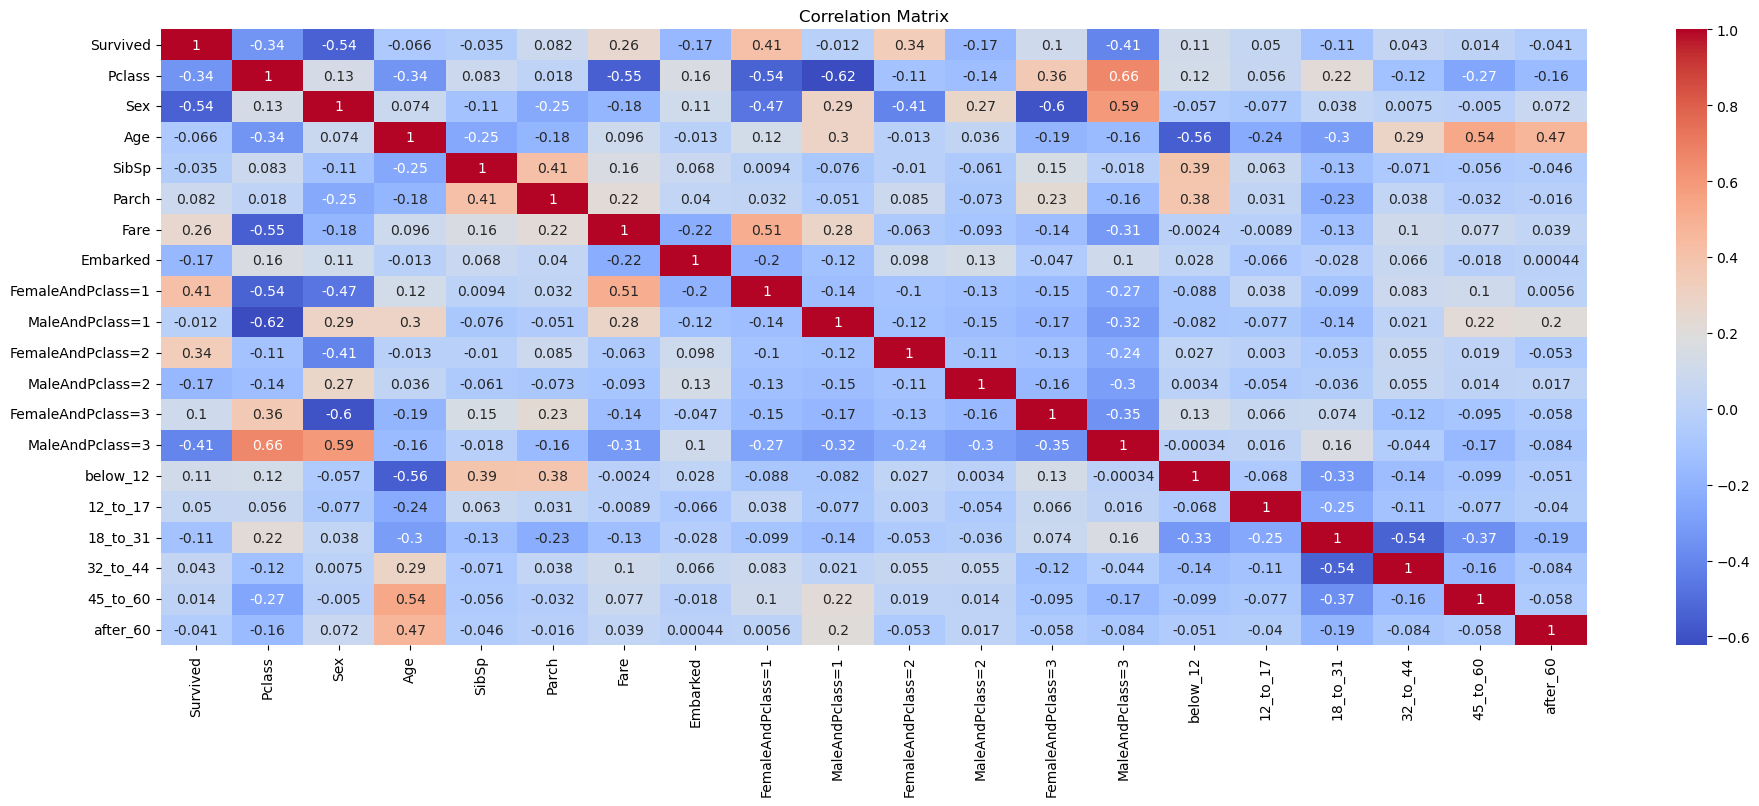

In [ ]:
plt.figure(figsize=(23,8))
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

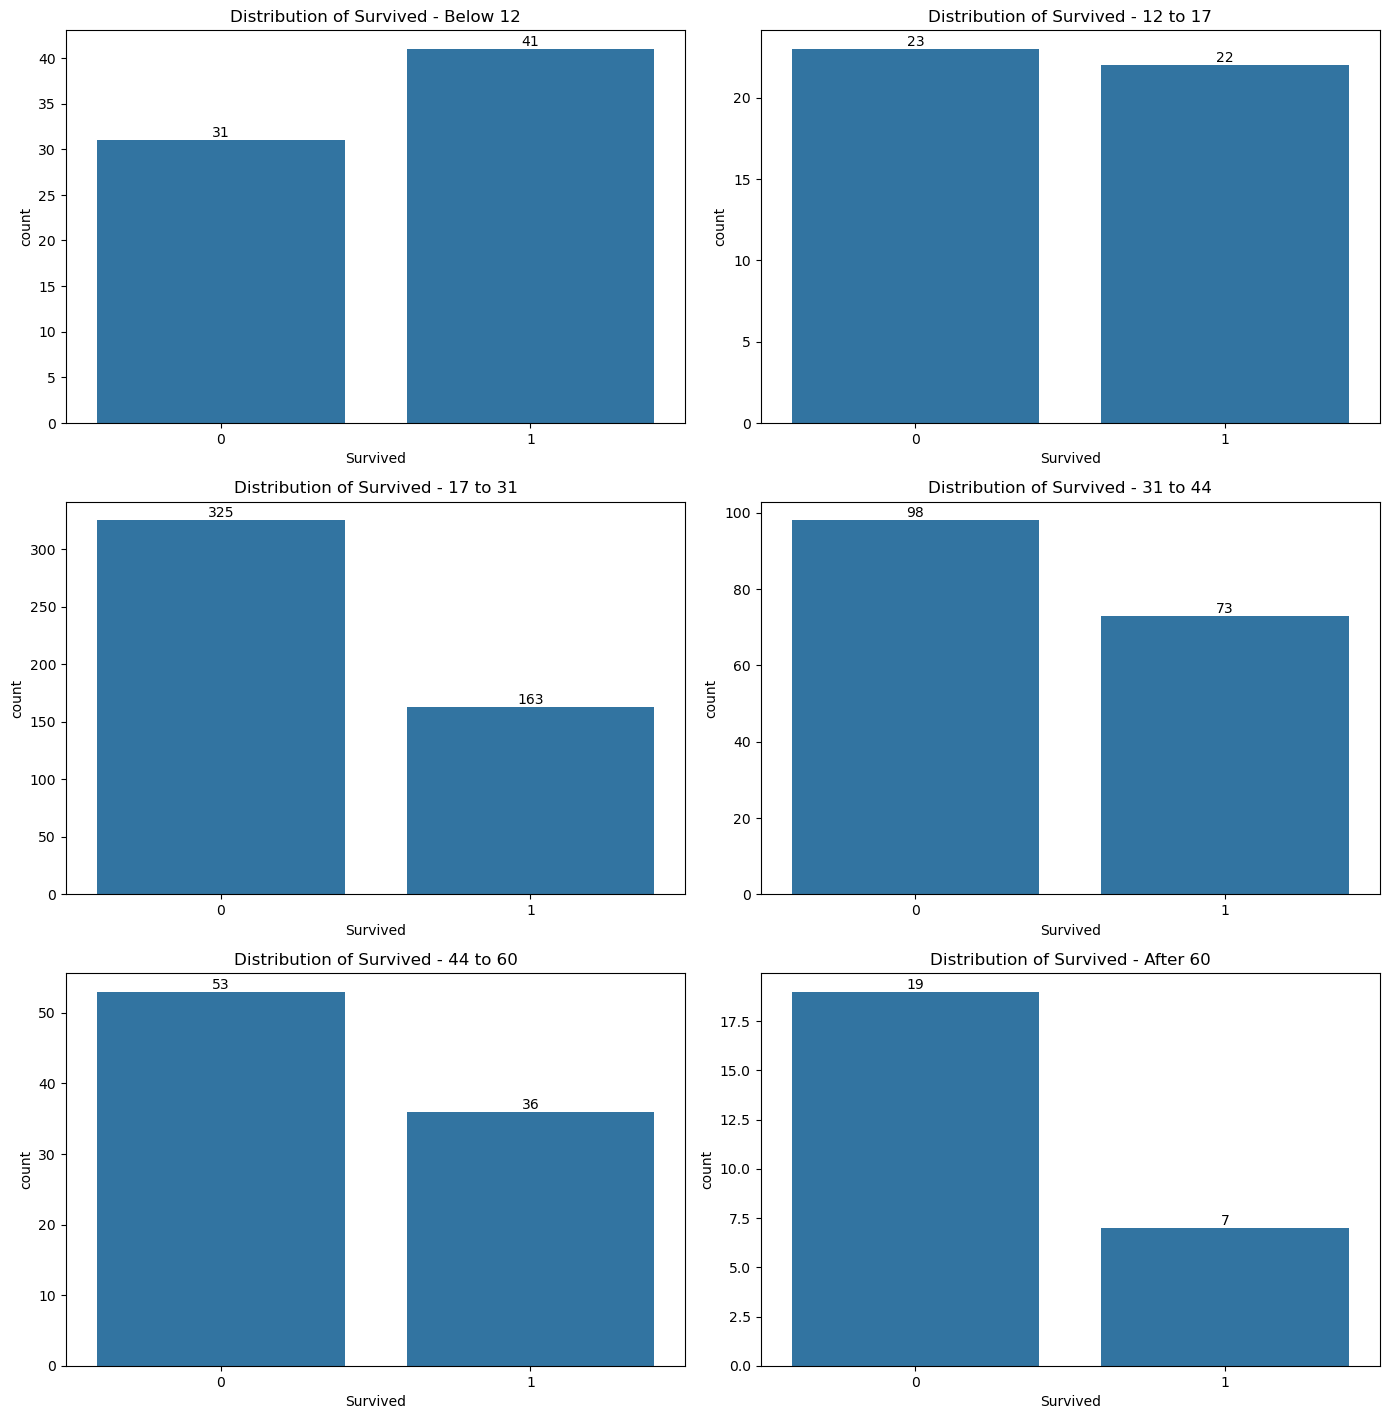

In [ ]:
below_12 = df_train["below_12"].apply(lambda x: x == 1)
below_18 = df_train["12_to_17"].apply(lambda x: x == 1)
below_32 = df_train["18_to_31"].apply(lambda x: x == 1)
below_45 = df_train["32_to_44"].apply(lambda x: x == 1)
below_60 = df_train["45_to_60"].apply(lambda x: x == 1)
after_60 = df_train["after_60"].apply(lambda x: x == 1)

df_list = [below_12, below_18, below_32, below_45, below_60, after_60]
names = ["Below 12", "12 to 17", "17 to 31", "31 to 44", "44 to 60", "After 60"]

plt.figure(figsize=(14, len(df_list) * 3 + 10))
for idx, (feature, name) in enumerate(zip(df_list, names), 1):
    plt.subplot(len(df_list), 2, idx)
    # sns.countplot(data=df[feature], x='Survived', hue='Pclass')
    sns.countplot(data=df_train[feature], x='Survived')
    plt.title(f'Distribution of Survived - {name}')
    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container)    

plt.tight_layout()
plt.show()